In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [42]:
column_names = ['player_name', 'team', 'age', 'player_height', 'player_weight',
               'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'gp',
                'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct',
                'ts_pct', 'ast_pct', 'season']

In [73]:
dataset = pd.read_csv("all_seasons.csv", sep = ",", skipinitialspace=True)


dataset.rename(columns={dataset.columns[0]: "id"}, inplace=True)
dataset.drop('id', axis=1, inplace=True)

dataset.head()

player_name team_abbreviation   age  player_height  player_weight  \
0  Randy Livingston               HOU  22.0         193.04      94.800728   
1  Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2      George Lynch               VAN  26.0         203.20     103.418976   
3    George McCloud               LAL  30.0         203.20     102.058200   
4      George Zidek               DEN  23.0         213.36     119.748288   

                 college country draft_year draft_round draft_number  ...  \
0        Louisiana State     USA       1996           2           42  ...   
1  Northwestern Oklahoma     USA       1994           2           34  ...   
2         North Carolina     USA       1993           1           12  ...   
3          Florida State     USA       1989           1            7  ...   
4                   UCLA     USA       1995           1           22  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0   3.9  1.5  2.4         0.3     0.042     0.071    0.169   0.487    0.248   
1   3.8  1.3  0.3         8.9     0.030     0.111    0.174   0.497    0.043   
2   8.3  6.4  1.9        -8.2     0.106     0.185    0.175   0.512    0.125   
3  10.2  2.8  1.7        -2.7     0.027     0.111    0.206   0.527    0.125   
4   2.8  1.7  0.3       -14.1     0.102     0.169    0.195   0.500    0.064   

    season  
0  1996-97  
1  1996-97  
2  1996-97  
3  1996-97  
4  1996-97  

[5 rows x 21 columns]

In [32]:
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  12844
#Features =  22


In [40]:
dataset[dataset.eq("").any(axis=1)].head()

Количество строк с отсутствующими данными: 0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


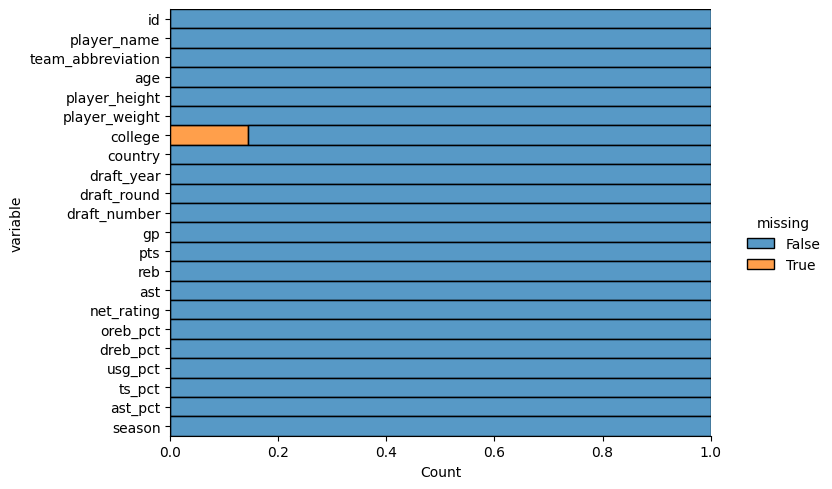

In [34]:
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [37]:
dataset['college'].fillna("None", inplace=True)


#Total of samples =  12844


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


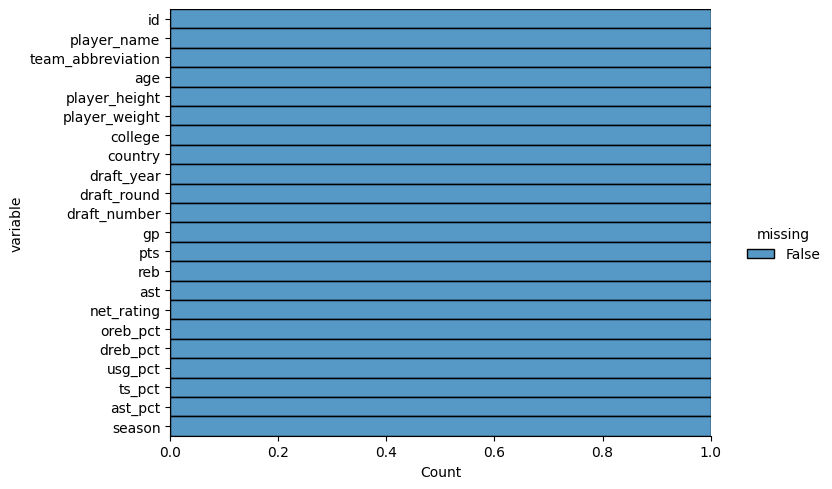

In [41]:
print("#Total of samples = ", dataset.shape[0])
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()



---
**Descriptive Statistical Analysis for Numerical Variables**


In [84]:
numerical_cols = [ "age", "player_height", "player_weight", "gp",
                "pts", "reb", "ast", "net_rating", "oreb_pct", "dreb_pct", "usg_pct",
                "ts_pct", "ast_pct"]

In [126]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "grey", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

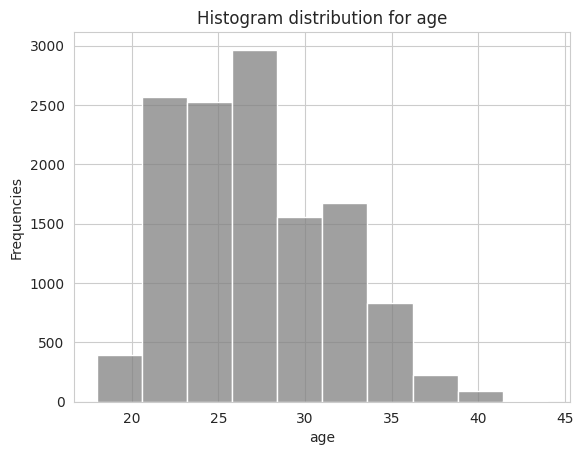

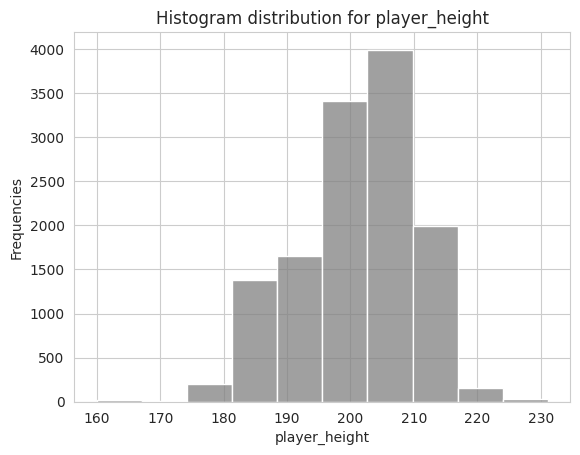

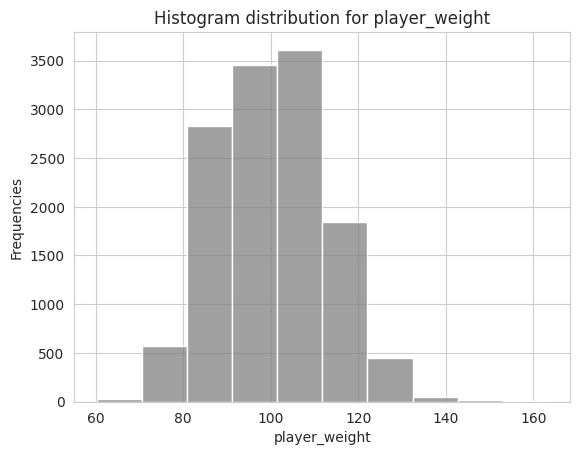

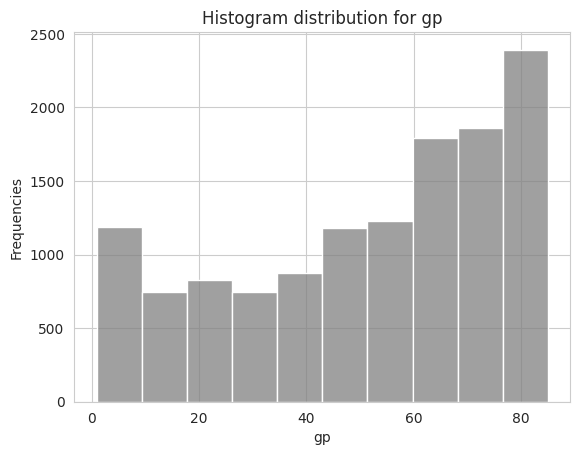

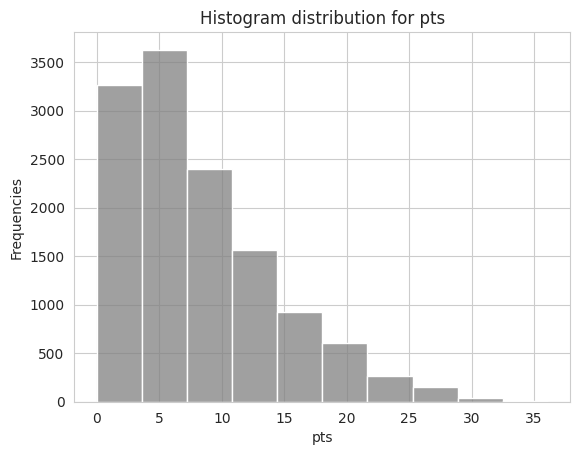

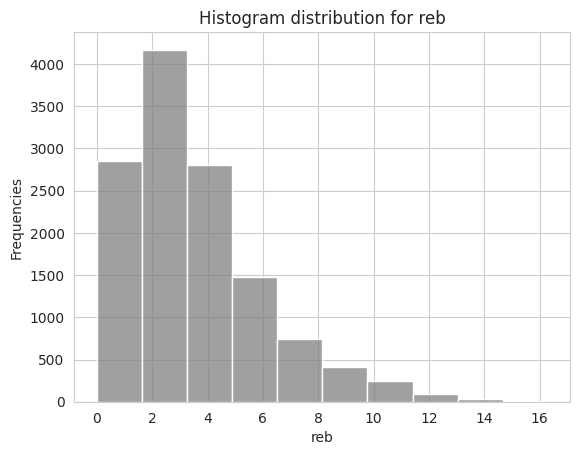

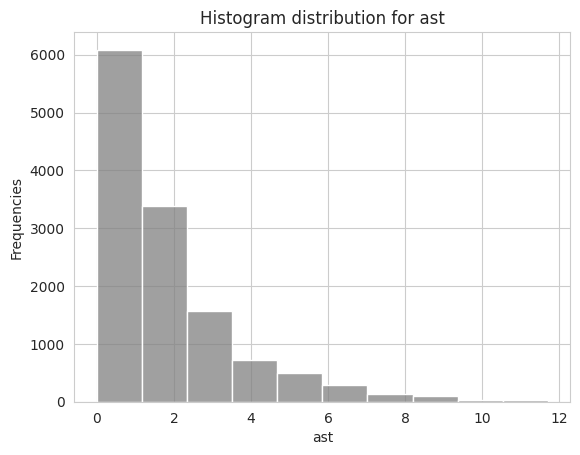

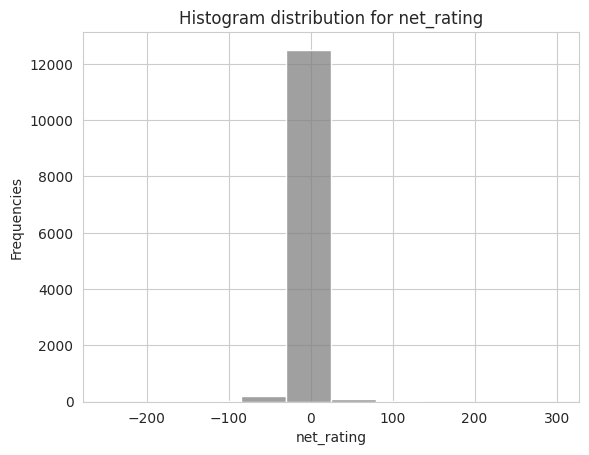

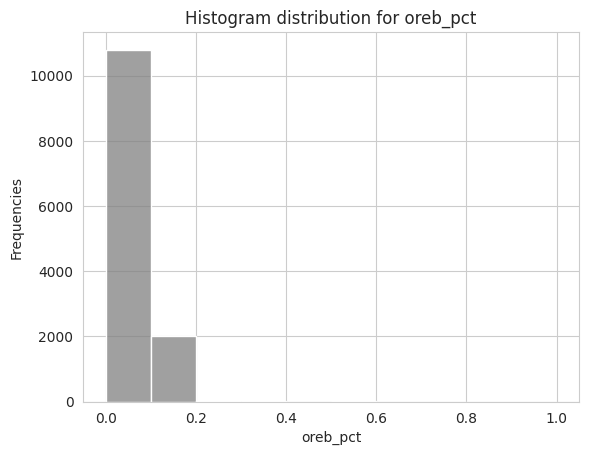

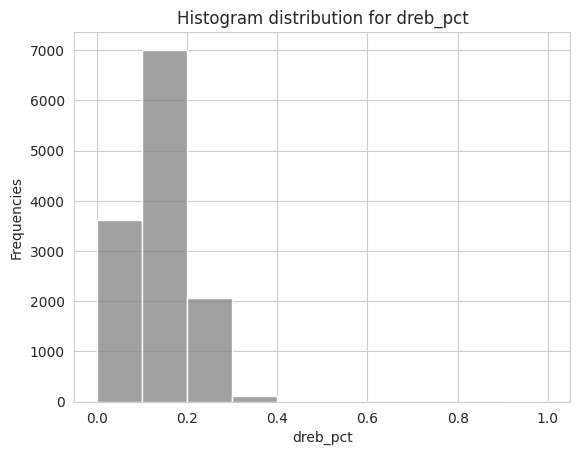

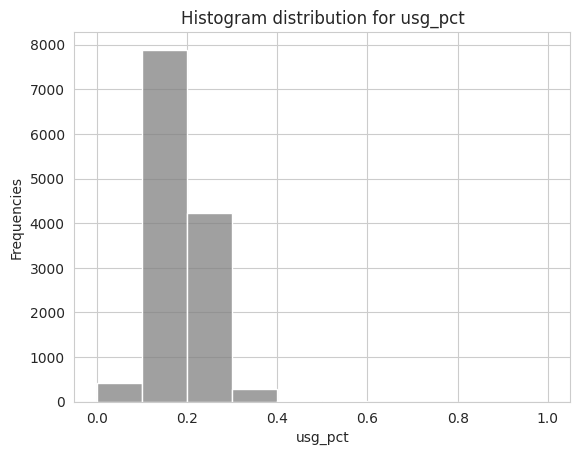

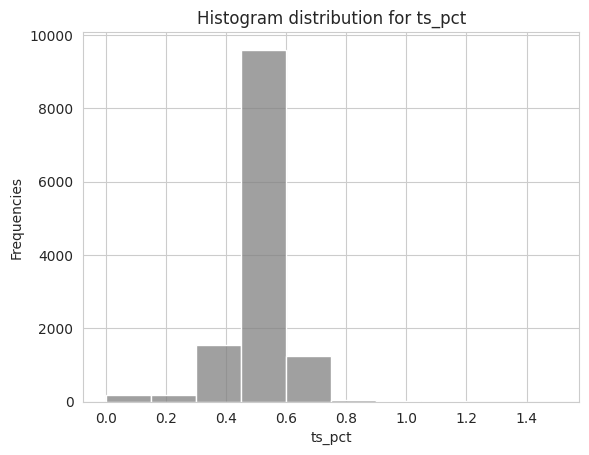

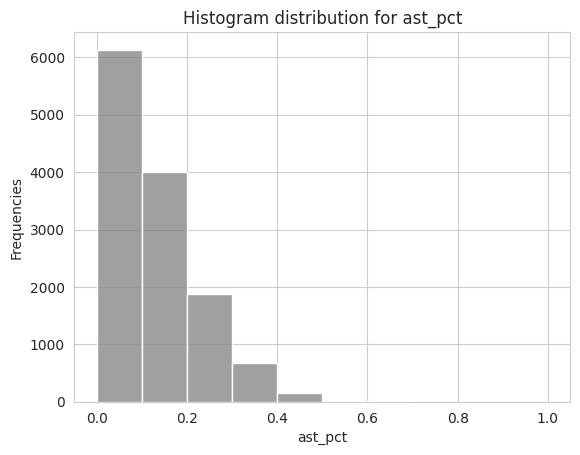

In [127]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

The histogram visually summarizes the distribution of data points across different intervals of the specified column.


---



In [89]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

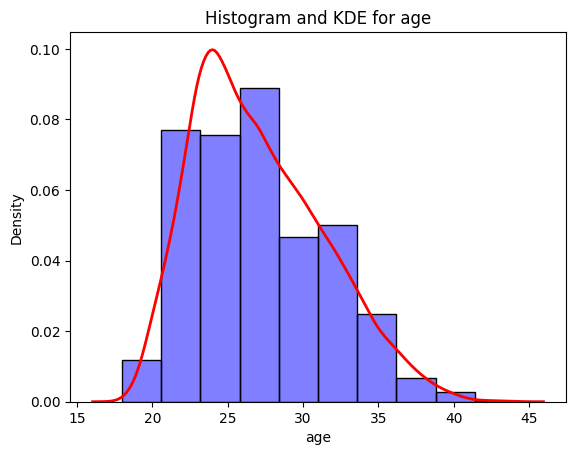

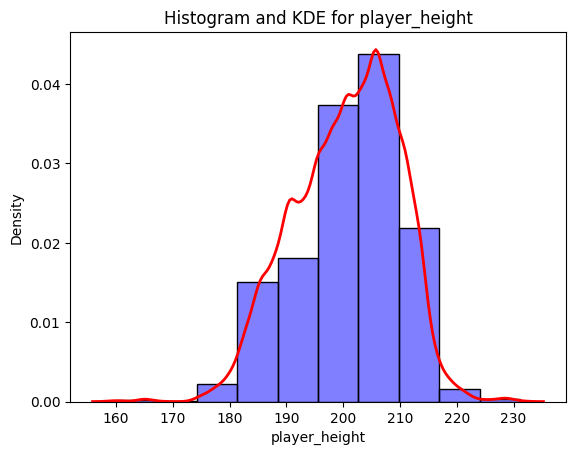

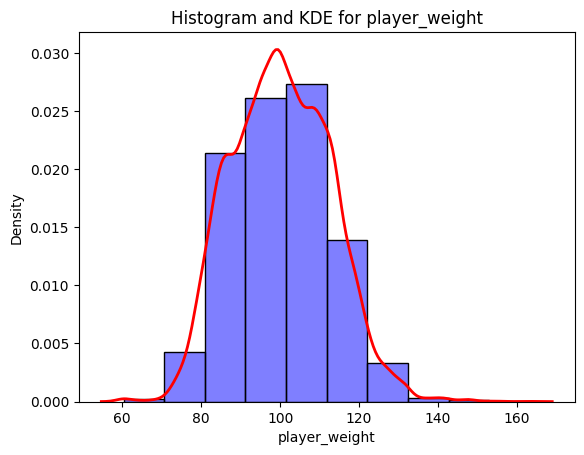

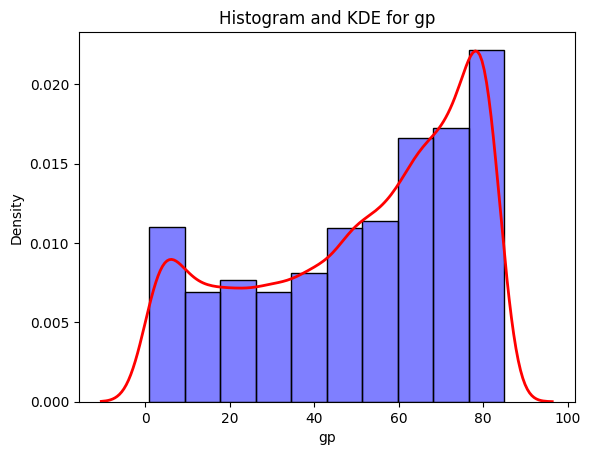

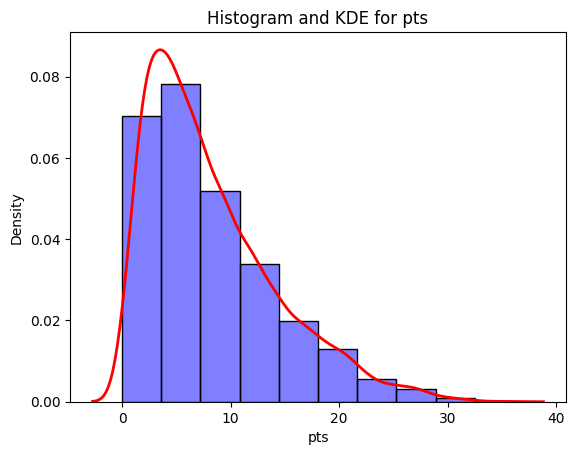

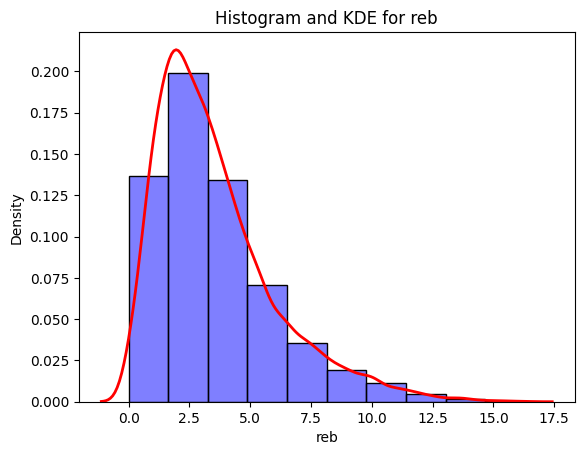

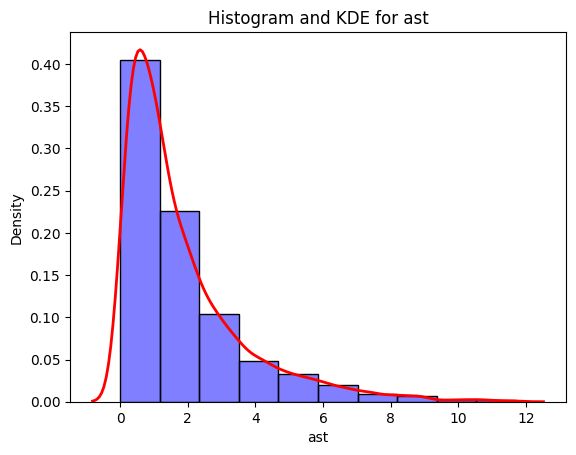

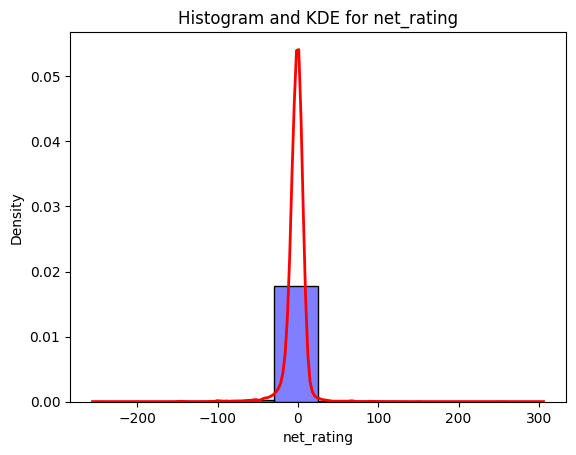

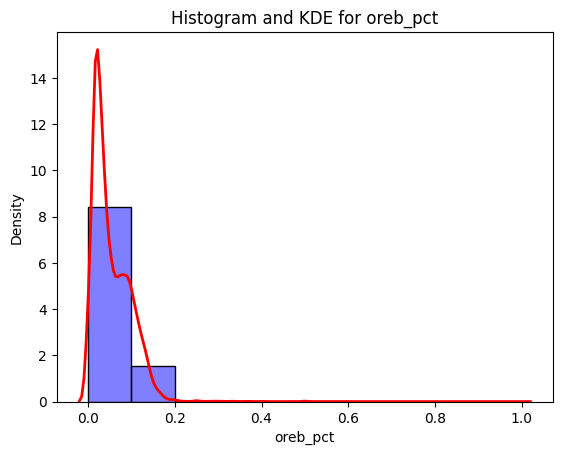

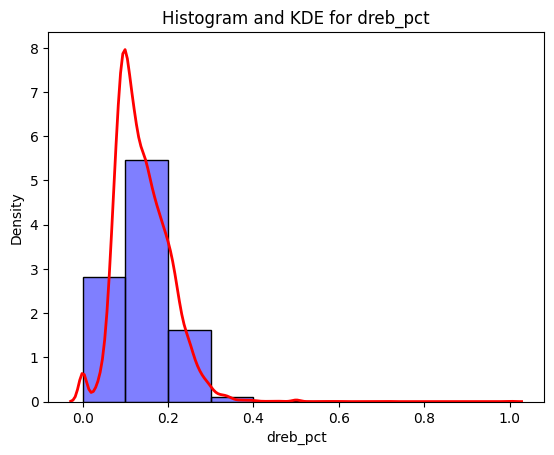

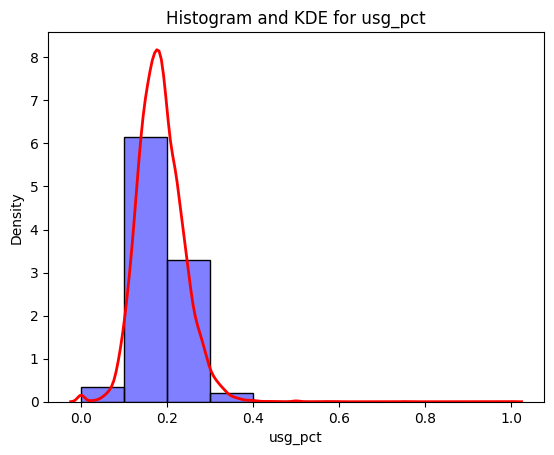

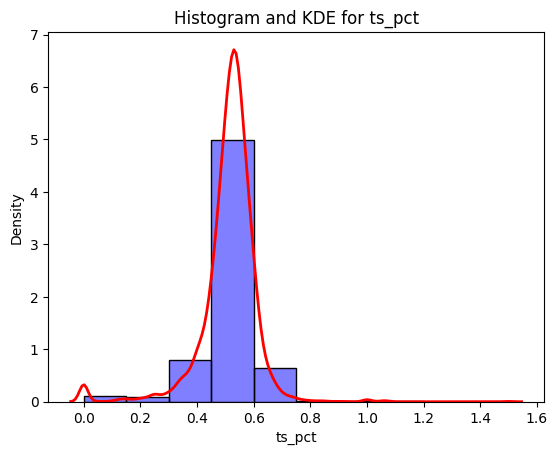

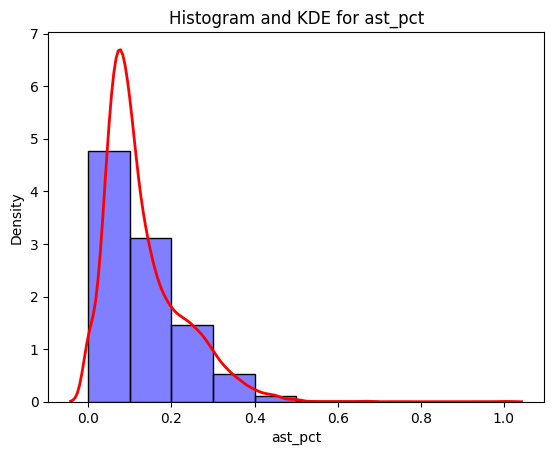

In [90]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Histogram with a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable.


---



In [91]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

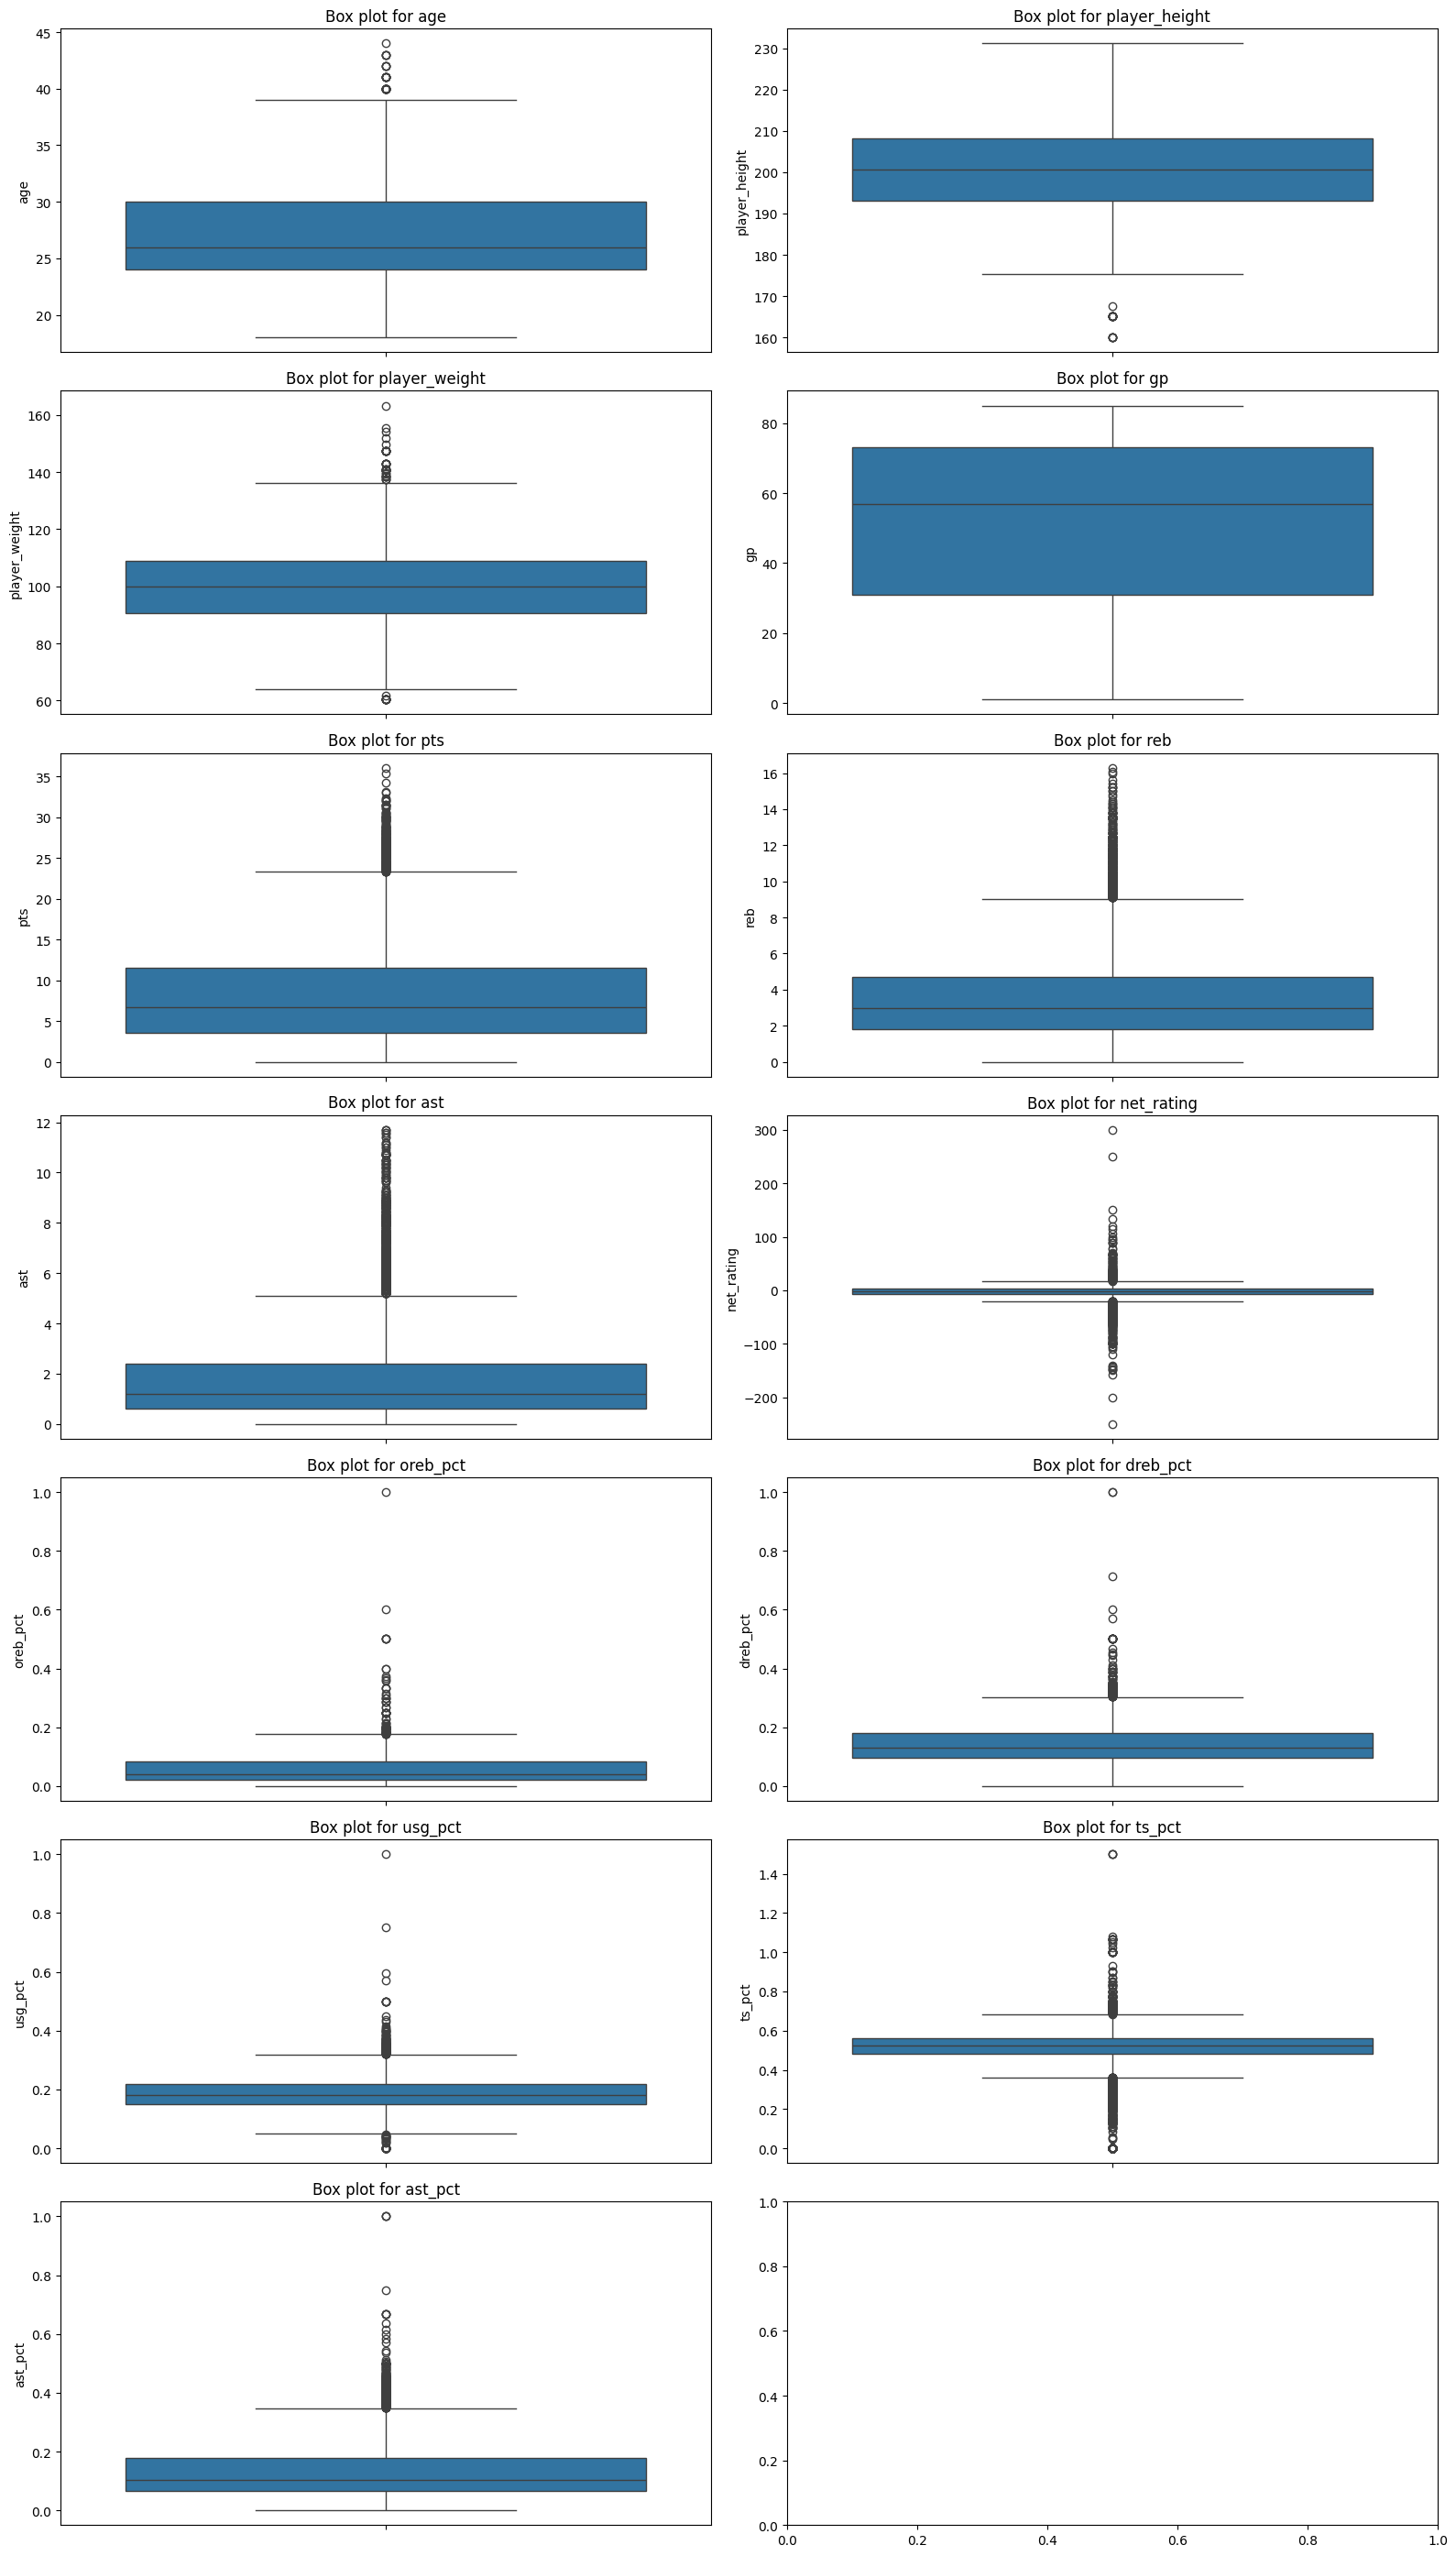

In [92]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

The box plot helps in visualizing the central tendency (median), data spread (IQR), and the presence of outliers in each numerical column.


---



In [93]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

age  player_height  player_weight            gp           pts  \
count  12844.000000   12844.000000   12844.000000  12844.000000  12844.000000   
mean      27.045313     200.555097     100.263279     51.154158      8.212582   
std        4.339211       9.111090      12.426628     25.084904      6.016573   
min       18.000000     160.020000      60.327736      1.000000      0.000000   
25%       24.000000     193.040000      90.718400     31.000000      3.600000   
50%       26.000000     200.660000      99.790240     57.000000      6.700000   
75%       30.000000     208.280000     108.862080     73.000000     11.500000   
max       44.000000     231.140000     163.293120     85.000000     36.100000   

                reb           ast    net_rating      oreb_pct      dreb_pct  \
count  12844.000000  12844.000000  12844.000000  12844.000000  12844.000000   
mean       3.558486      1.824681     -2.226339      0.054073      0.140646   
std        2.477885      1.800840     12.665124      0.043335      0.062513   
min        0.000000      0.000000   -250.000000      0.000000      0.000000   
25%        1.800000      0.600000     -6.400000      0.021000      0.096000   
50%        3.000000      1.200000     -1.300000      0.040000      0.130500   
75%        4.700000      2.400000      3.200000      0.083000      0.179000   
max       16.300000     11.700000    300.000000      1.000000      1.000000   

            usg_pct        ts_pct       ast_pct  
count  12844.000000  12844.000000  12844.000000  
mean       0.184641      0.513138      0.131595  
std        0.053545      0.101724      0.094172  
min        0.000000      0.000000      0.000000  
25%        0.149000      0.482000      0.066000  
50%        0.181000      0.525000      0.103000  
75%        0.217000      0.563000      0.179000  
max        1.000000      1.500000      1.000000

In [94]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.figure(figsize=(10, 10))
    plt.matshow(corr, cmap = "coolwarm", fignum=1)
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

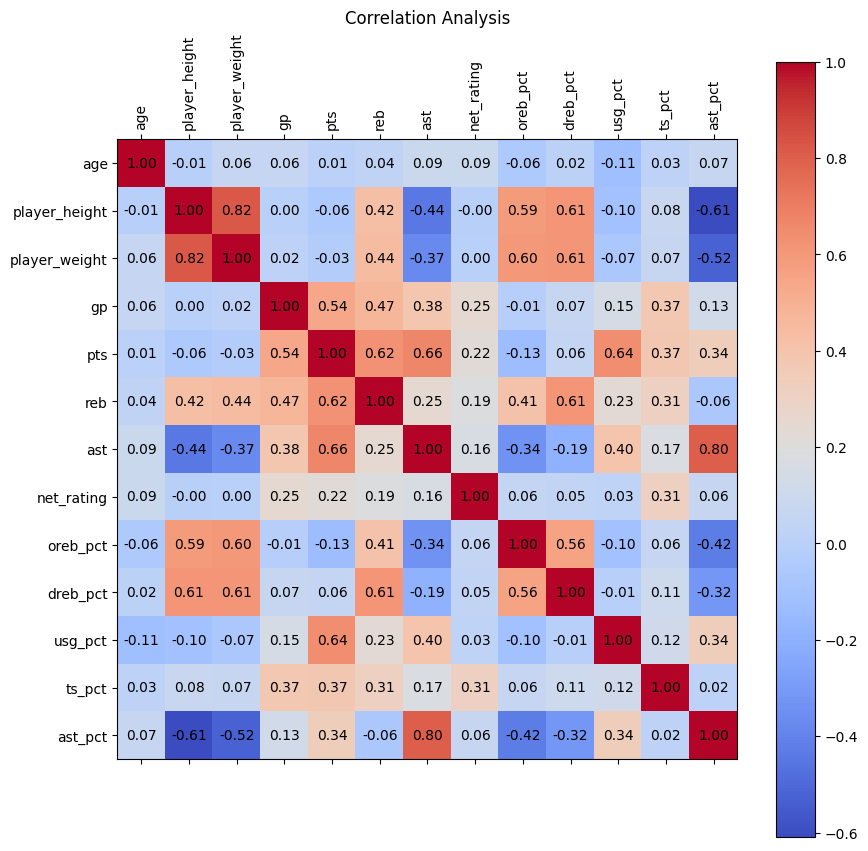

In [95]:
plot_correlation(dataset, numerical_cols)

The values inside each cell represent the Pearson correlation coefficient, ranging from -1 (strong negative correlation) to +1 (strong positive correlation), with 0 indicating no correlation.


---



In [65]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)

    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    return outliers

In [68]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in age ***
#samples outlier to distribution = 267
%outliers = 2.08 %

*** Outliers detection in player_height ***
#samples outlier to distribution = 400
%outliers = 3.11 %

*** Outliers detection in player_weight ***
#samples outlier to distribution = 553
%outliers = 4.31 %

*** Outliers detection in gp ***
#samples outlier to distribution = 147
%outliers = 1.14 %

*** Outliers detection in pts ***
#samples outlier to distribution = 570
%outliers = 4.44 %

*** Outliers detection in reb ***
#samples outlier to distribution = 469
%outliers = 3.65 %

*** Outliers detection in ast ***
#samples outlier to distribution = 290
%outliers = 2.26 %

*** Outliers detection in net_rating ***
#samples outlier to distribution = 584
%outliers = 4.55 %

*** Outliers detection in oreb_pct ***
#samples outlier to distribution = 285
%outliers = 2.22 %

*** Outliers detection in dreb_pct ***
#samples outlier to distribution = 579
%outliers = 4.51 %

*** Outliers detection in usg_pct

---
**Descriptive Statistical Analysis
for Categorical Variables**




In [96]:
# list of categorical variables
categorical_vars = ["team_abbreviation", "college", "country", "draft_year",
                    "draft_round", "draft_number", "season"]
categorical_vars

['team_abbreviation',
 'college',
 'country',
 'draft_year',
 'draft_round',
 'draft_number',
 'season']

In [97]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** team_abbreviation ******
team_abbreviation
CLE    450
TOR    446
MIA    443
DAL    443
WAS    442
LAC    442
ATL    439
PHI    438
SAS    434
HOU    433
LAL    429
ORL    428
IND    428
DEN    428
POR    428
MIL    427
GSW    426
NYK    426
BOS    425
CHI    423
DET    419
SAC    418
UTA    417
MIN    417
PHX    415
MEM    370
CHA    305
NJN    257
OKC    255
BKN    200
SEA    182
NOP    175
NOH    143
CHH     89
VAN     72
NOK     32
Name: count, dtype: int64

***** college ******
college
Kentucky              447
Duke                  410
North Carolina        355
UCLA                  318
Arizona               293
                     ... 
Alabama A&M             1
Eastern Illinois        1
Jacksonville State      1
Texas-Arlington         1
Buffalo                 1
Name: count, Length: 354, dtype: int64

***** country ******
country
USA                    10721
Canada                   205
France                   190
Australia                100
Spain                     9

The characteristic of the dataset is that we have a lot of instances of each category, so the visual display of graphs is not the best.

In [100]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    plt.figure(figsize=(10, len(results) * 0.5))
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

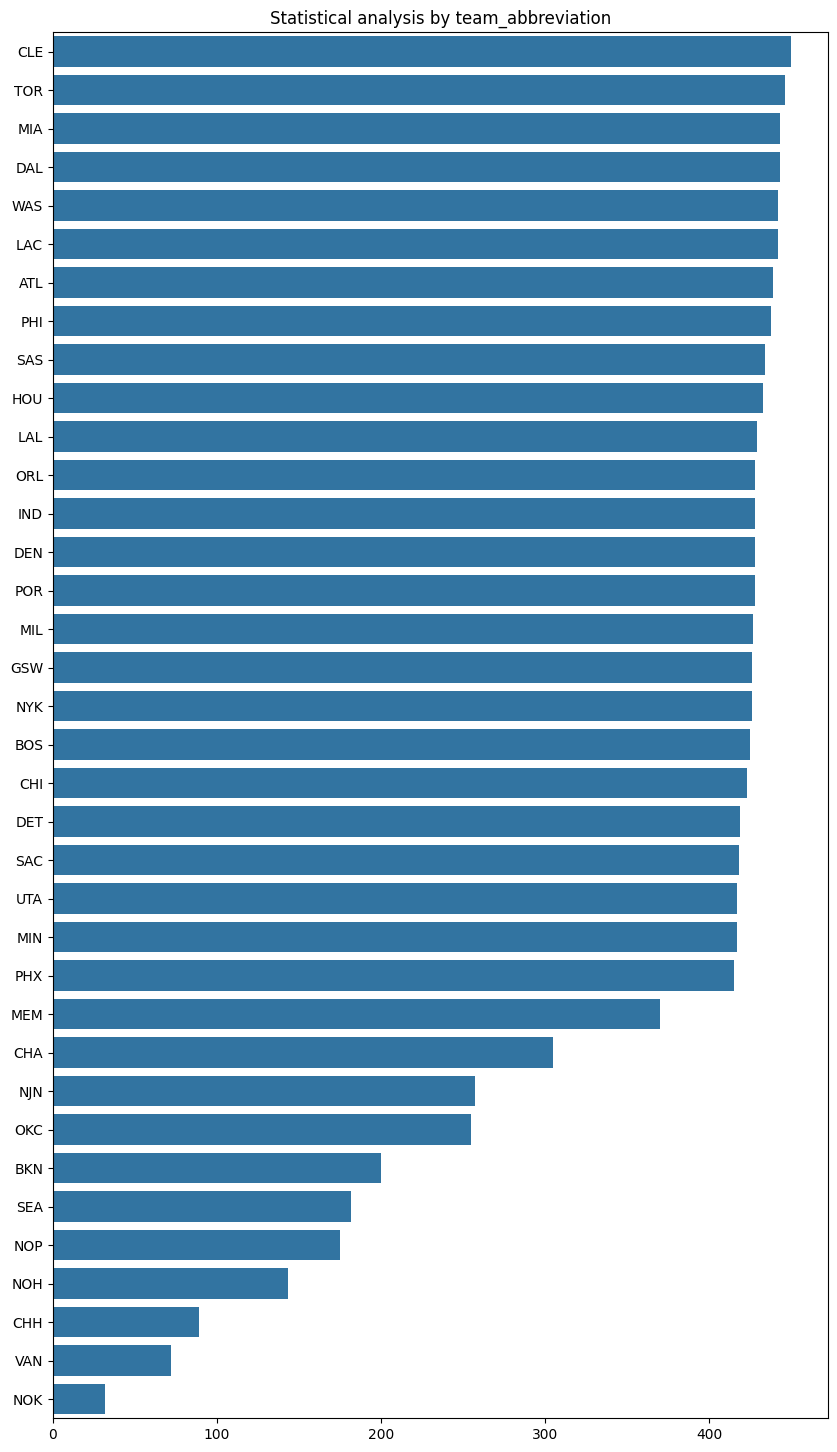

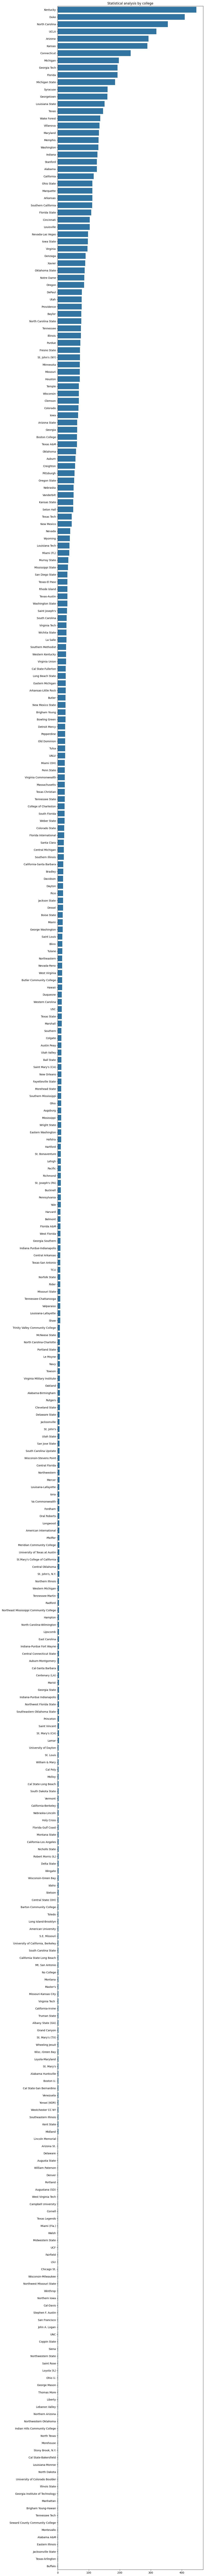

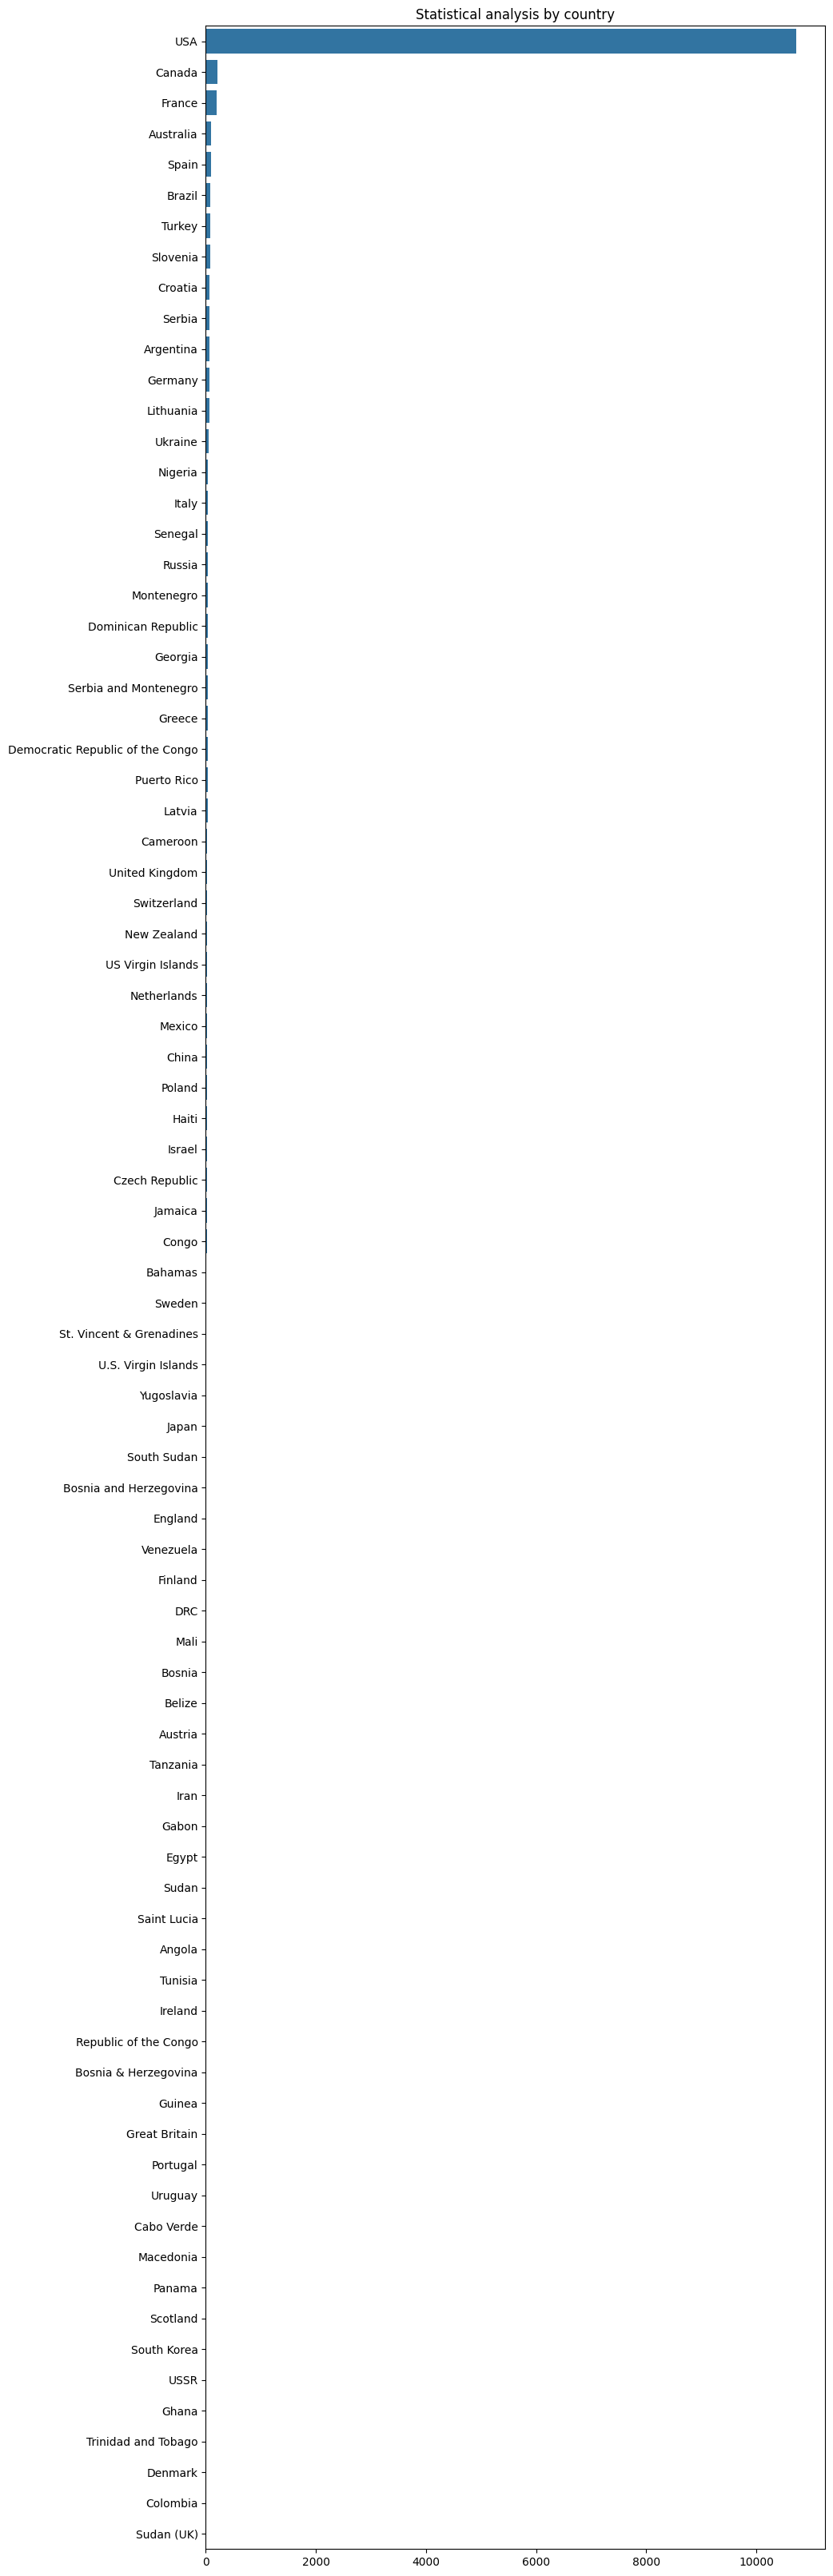

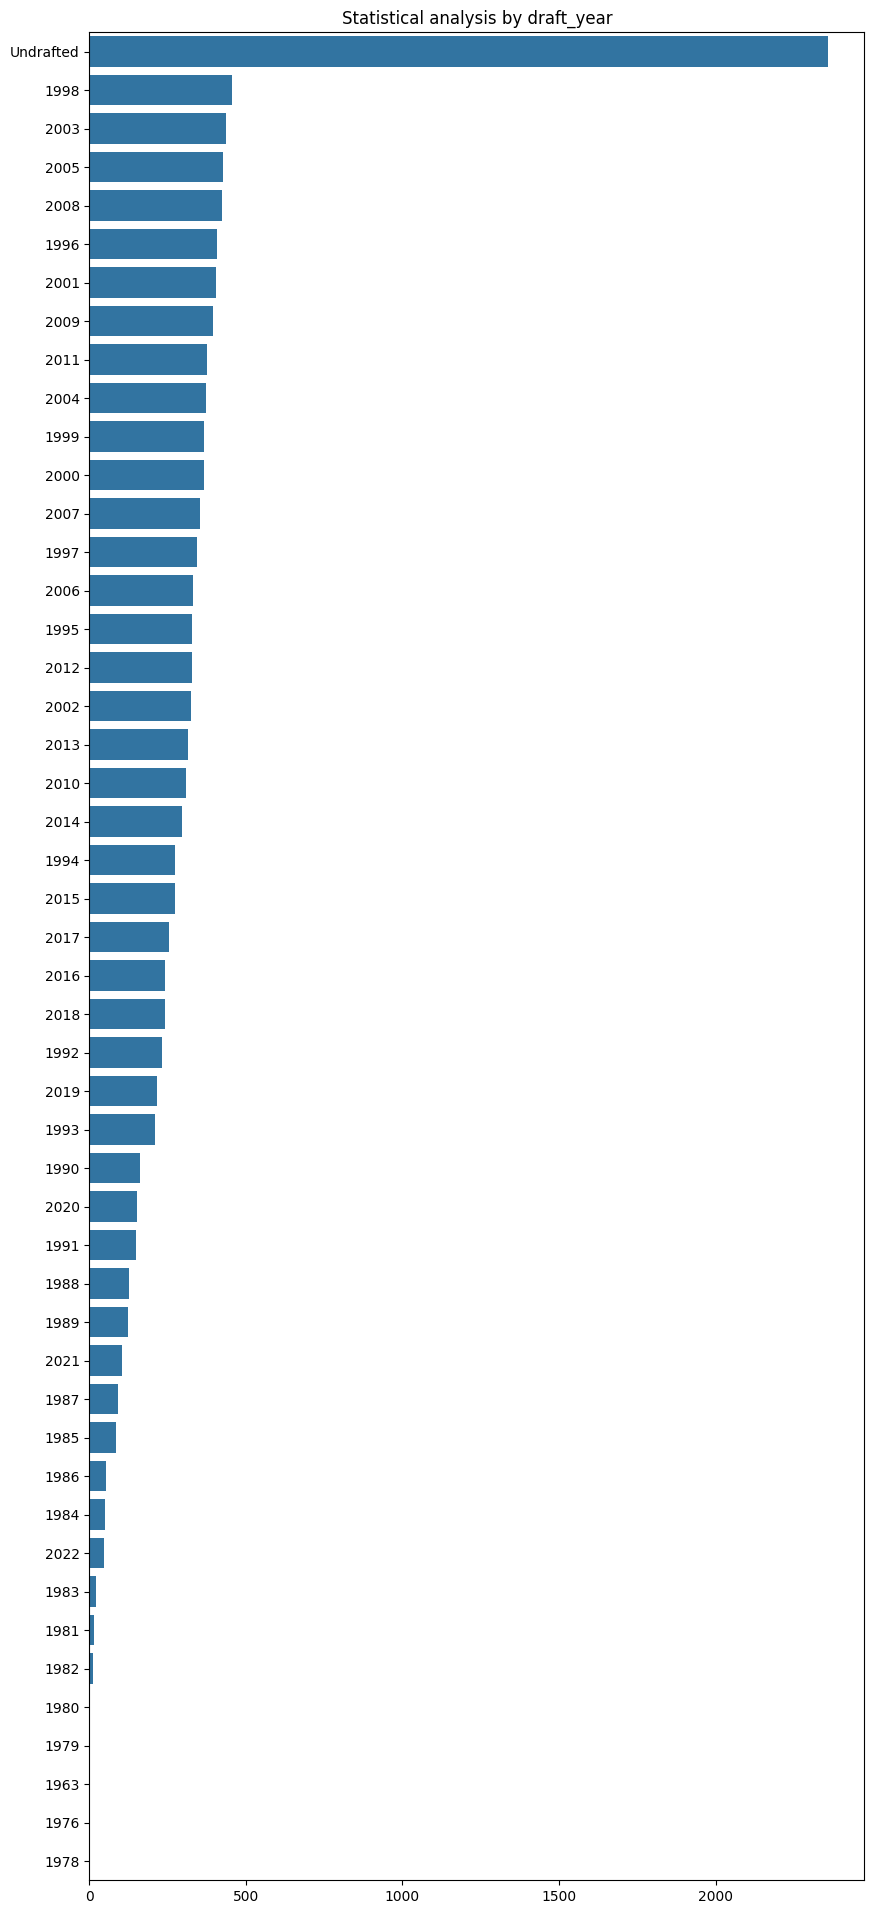

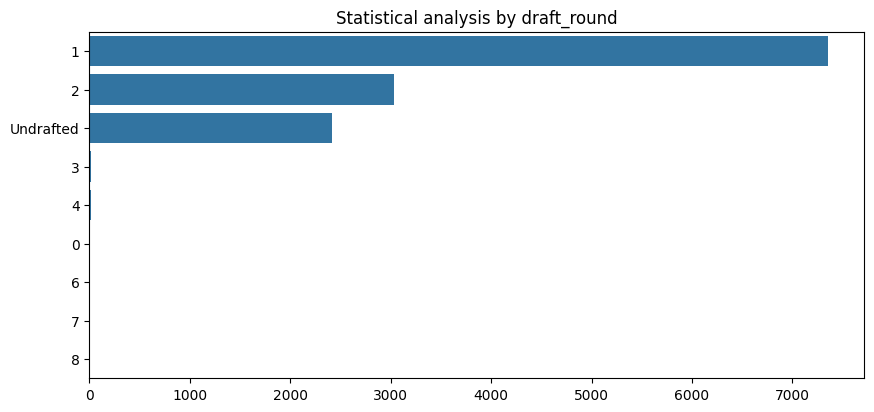

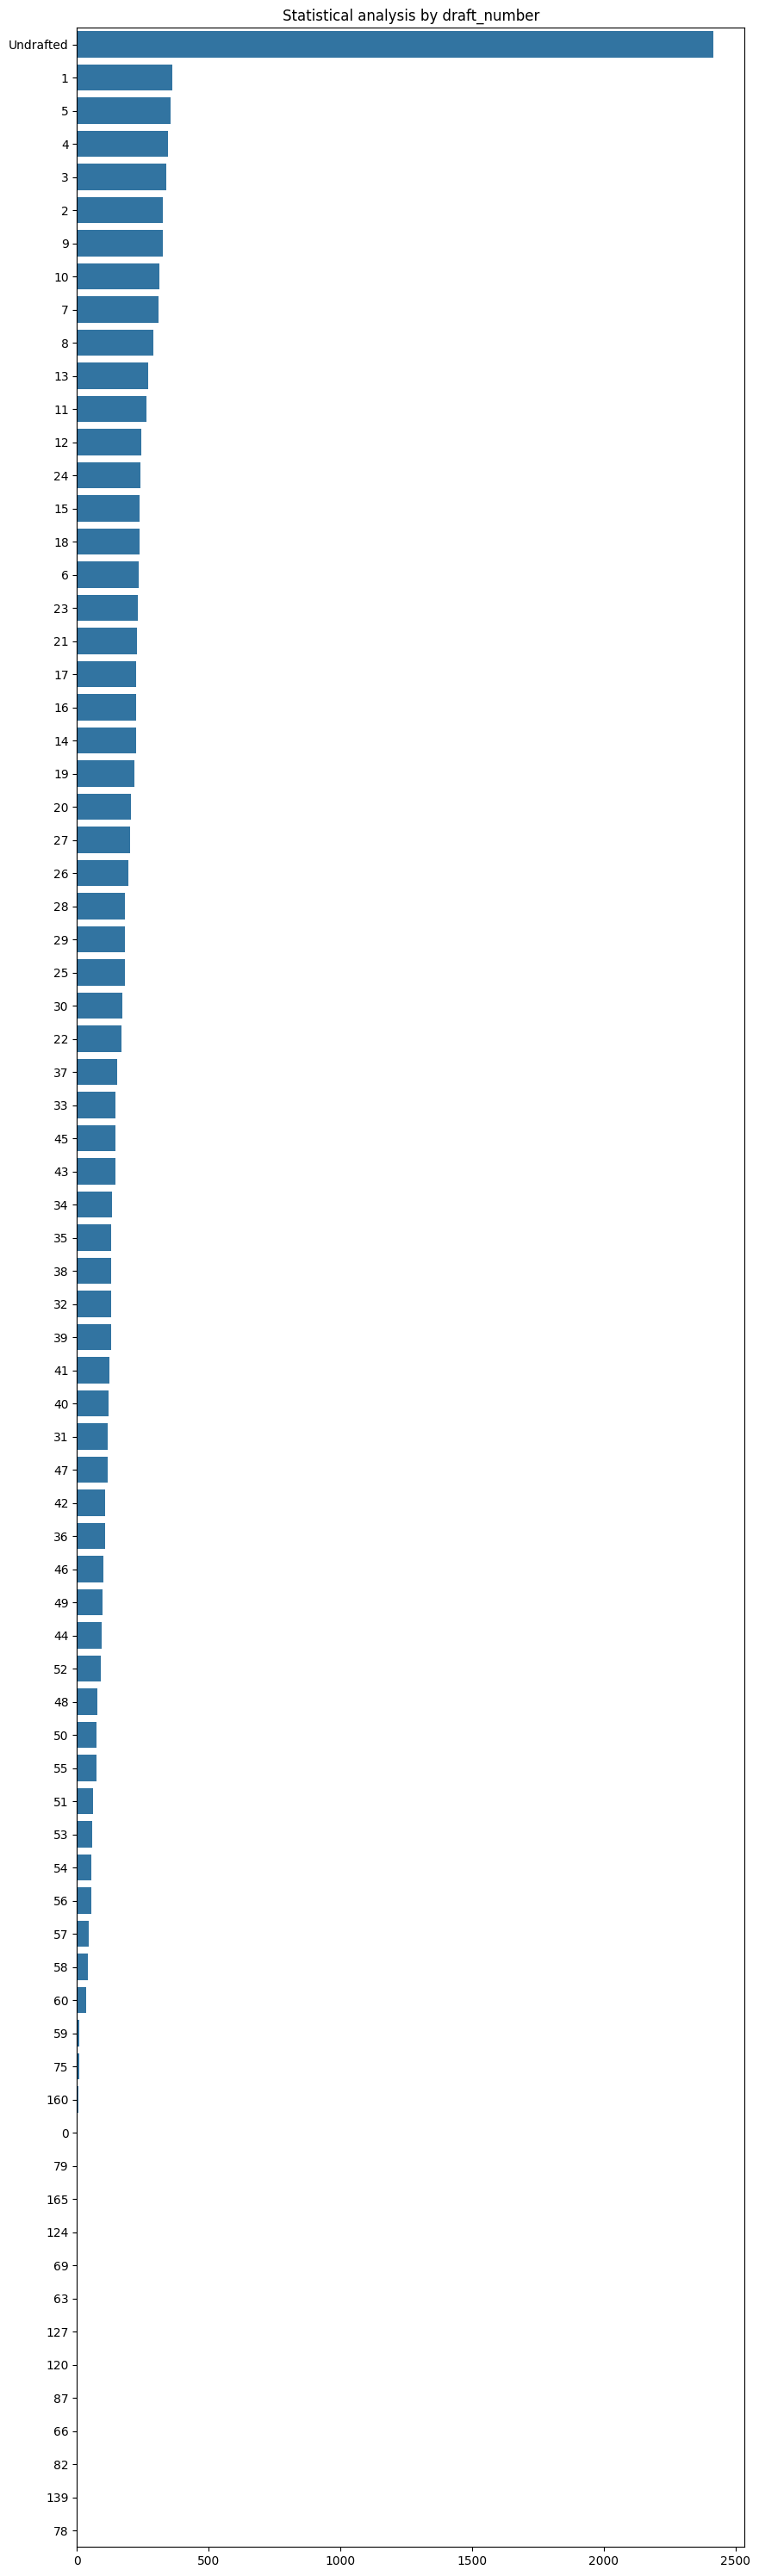

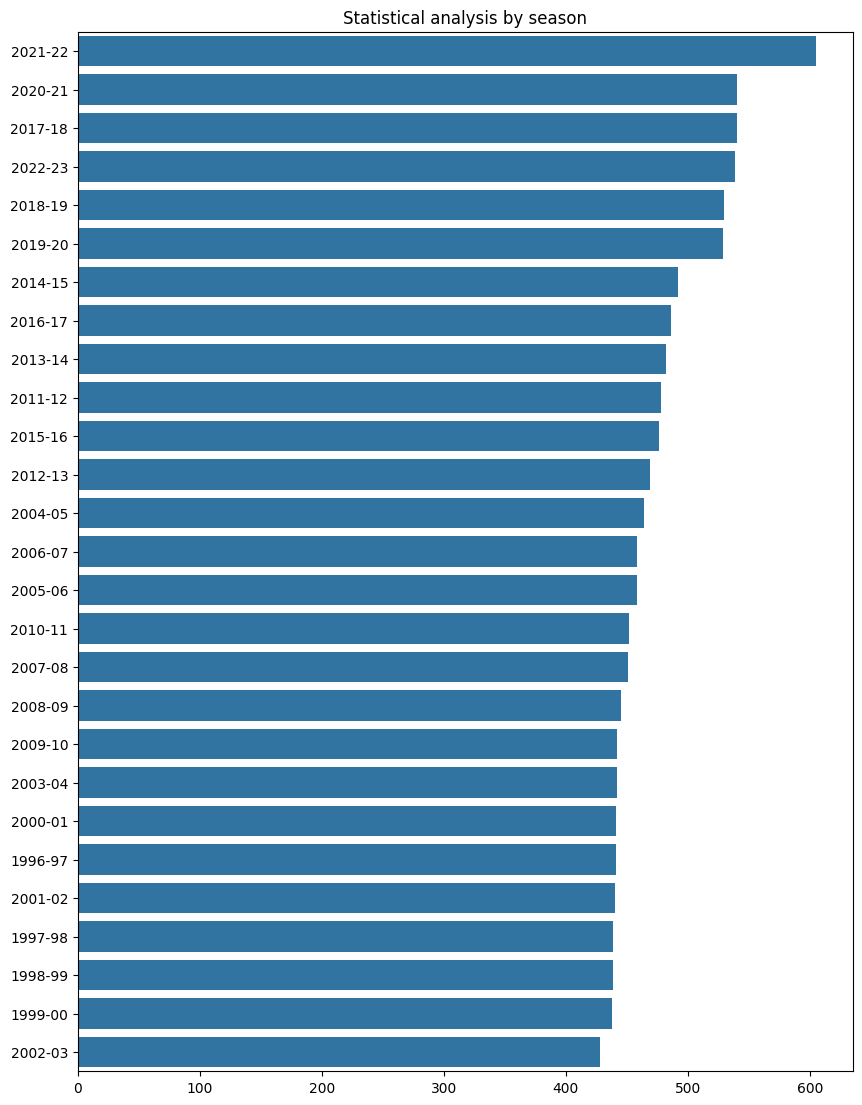

In [101]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

This plot helps in visualizing the distribution of categorical data, showing which categories are most or least frequent.

---



In [102]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

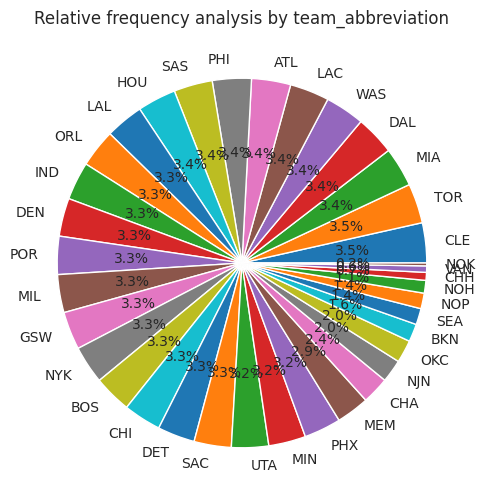

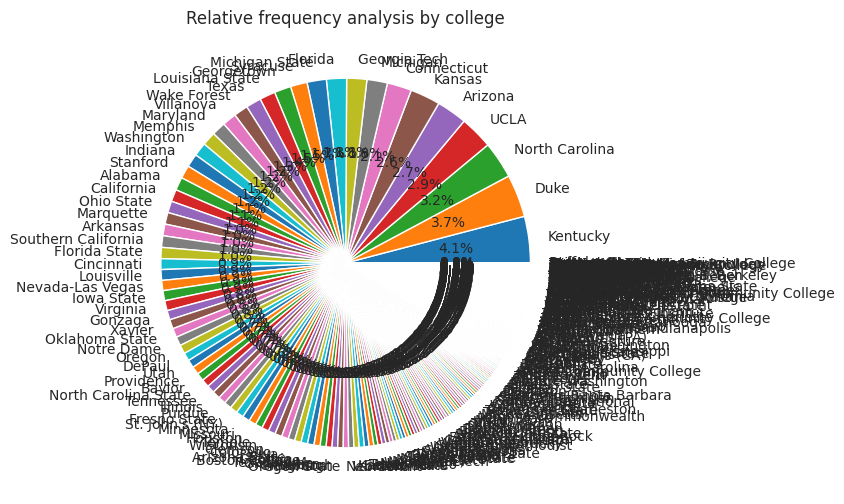

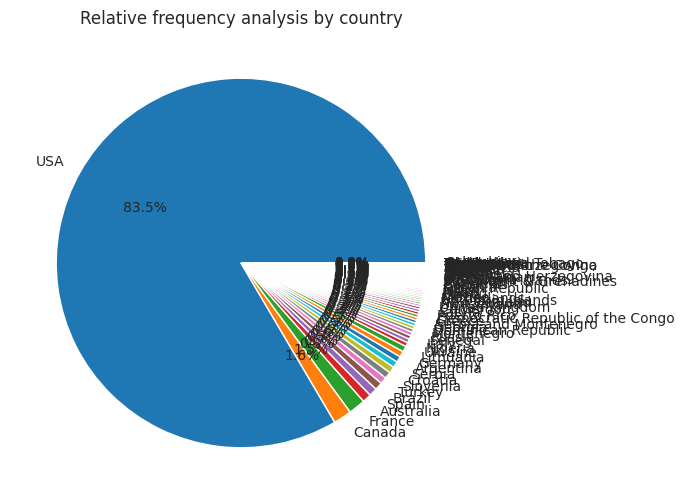

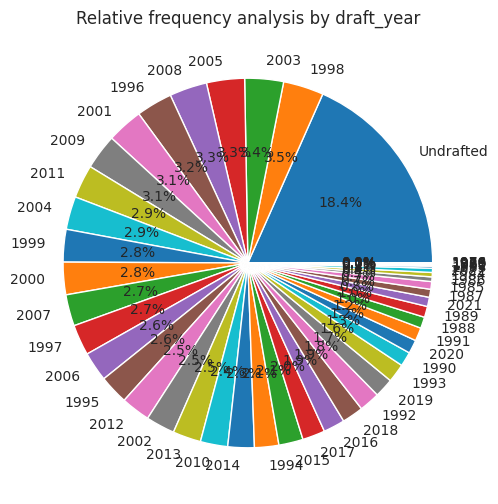

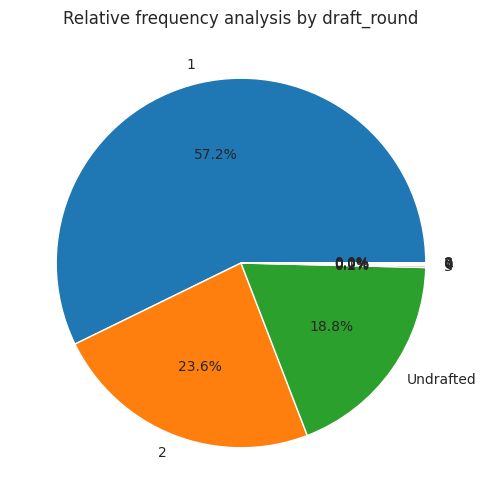

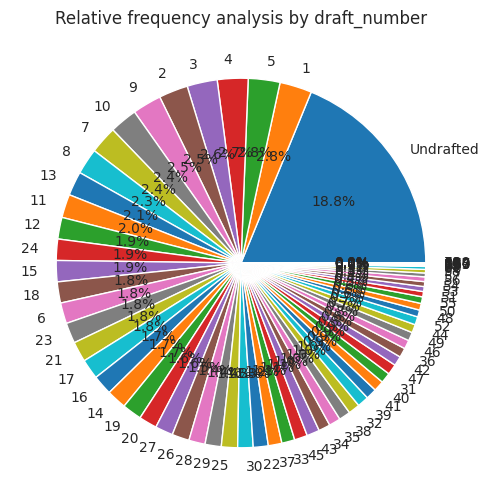

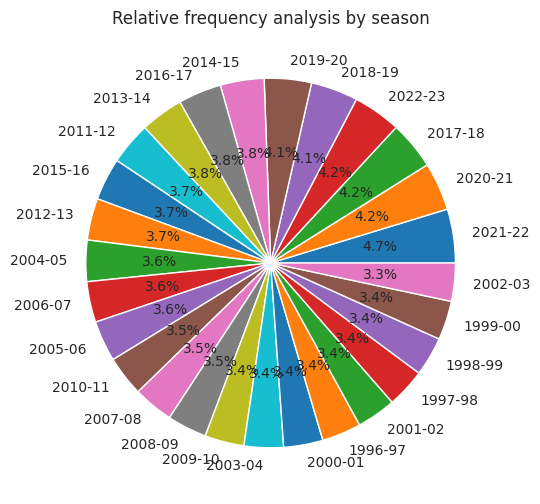

In [103]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

The pie chart helps in understanding the proportion of different categories in the data. But not in our case, bacause we have so many instanses of some categories.



---


**Descriptive Statistical Analysis for Groups of Categorical Variables**

In [111]:
# create groups organized by sex and income
group_team_season = dataset.groupby(["season", "draft_round"]).size().reset_index(name = "samples")
print(group_team_season)

      season draft_round  samples
0    1996-97           1      246
1    1996-97           2      112
2    1996-97           3        8
3    1996-97           4        2
4    1996-97           6        3
..       ...         ...      ...
104  2021-22           2      144
105  2021-22   Undrafted      180
106  2022-23           1      280
107  2022-23           2      122
108  2022-23   Undrafted      137

[109 rows x 3 columns]


In [117]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    plt.figure(figsize=(12, len(group[g1].unique()) * 0.6))
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Season')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Season and Draft Rounds')
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

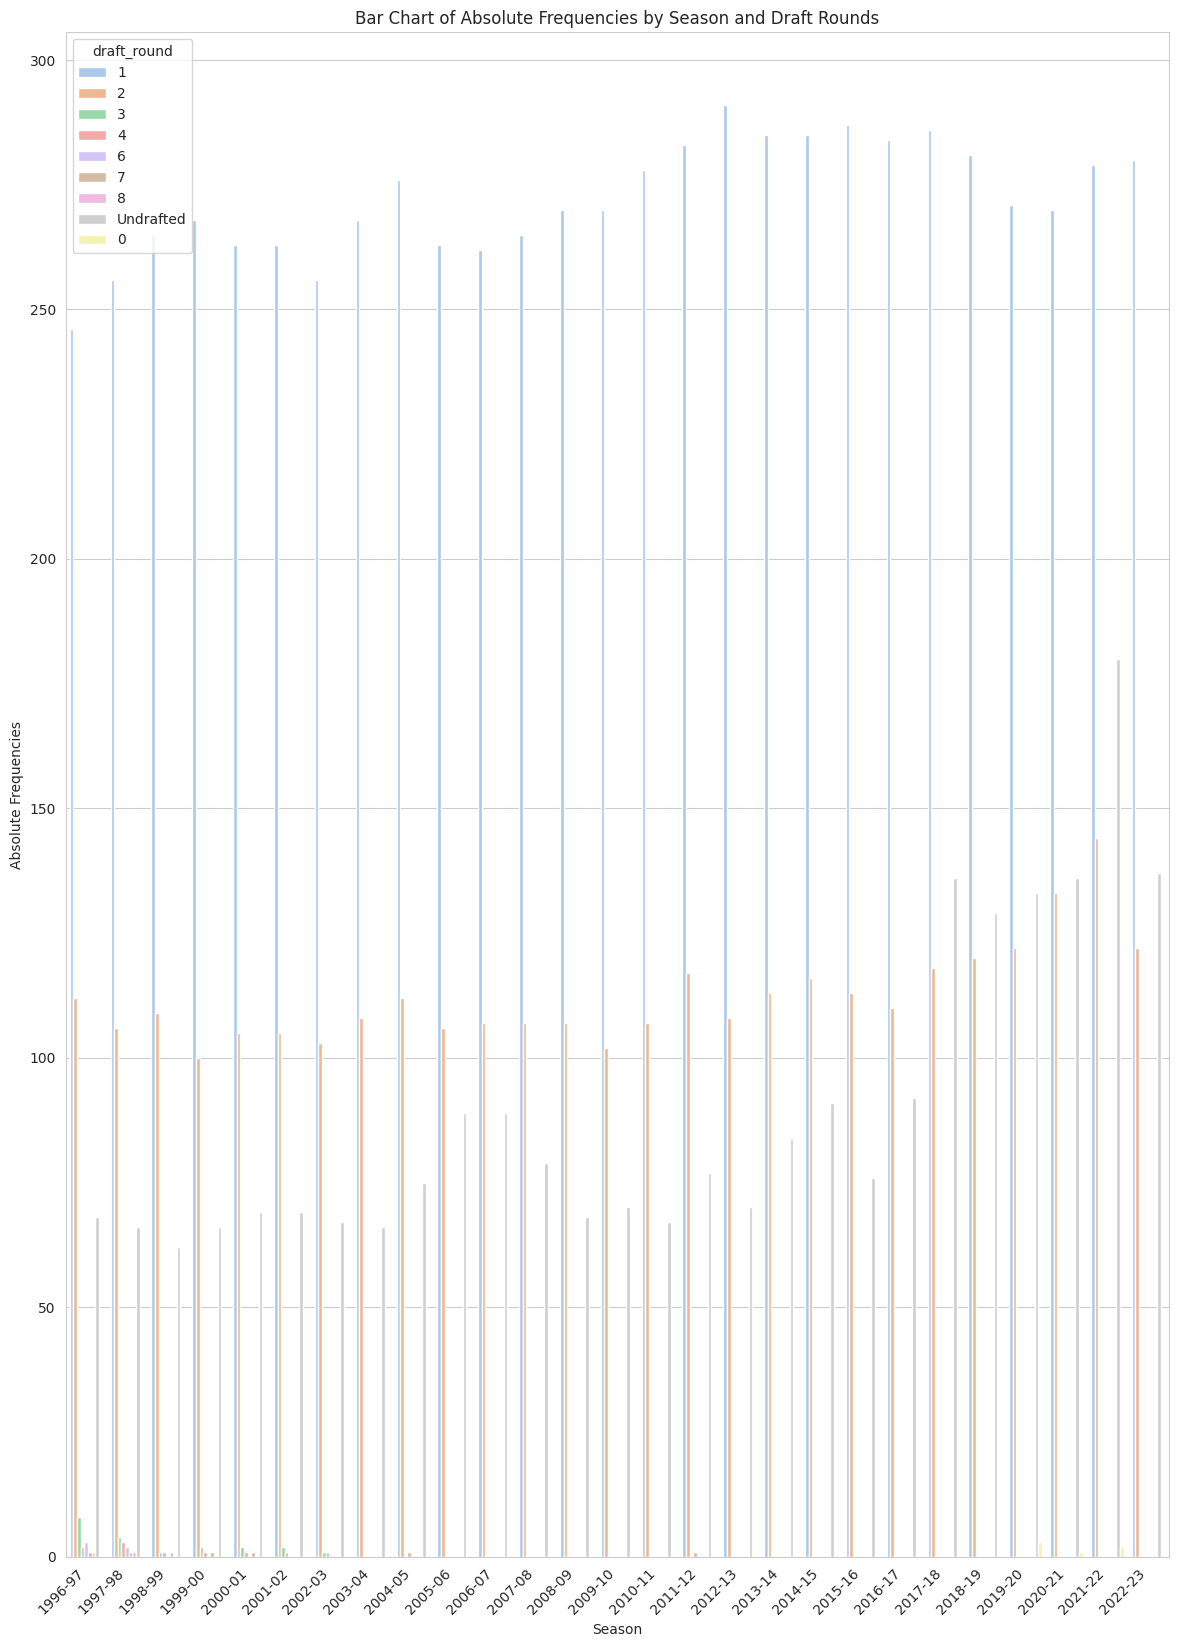

In [118]:
plot_absfreq_groups(group_team_season, "season", "draft_round")

This plot helps compare the frequency distribution of samples across different seasons and draft rounds.

In [124]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " Round " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Season and Draft Round')
    plt.show()

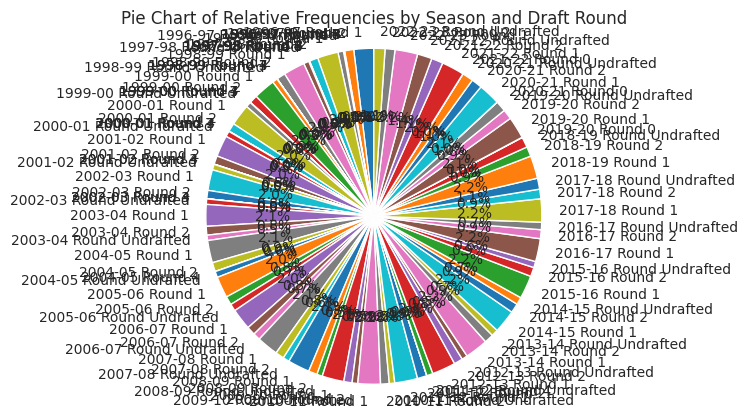

In [125]:
plot_relfreq_groups(group_team_season, "season", "draft_round")